In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
ESV_df = pd.read_table("../0. Data/resample_merged.grouped.filtered.otu-table.chname.txt")
ESV_df

,ID,UK01A,UK02A,UK03A,UK04A,UK05A,UK06A,UK08A,UK09A,UK10A,...,N52B,N52C,N52I,N52E,GZ100,GZ101,GZ102,GZ103,GZ104,N01A
0,ESV1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,ESV2,1350,1663,1724,1603,1613,1696,1734,1084,1045,...,1411,1770,517,1936,0,0,0,0,0,176
2,ESV3,641,1124,1129,985,799,895,727,720,682,...,0,0,0,0,0,0,0,0,0,26
3,ESV4,0,0,0,0,0,0,0,0,0,...,0,32,77,48,0,30,0,0,0,0
4,ESV5,314,507,490,632,633,723,933,800,712,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37854,ESV37855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37855,ESV37856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37856,ESV37857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37857,ESV37858,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 전체 샘플의 95% 이상에서 abundance=0인 ESV는 제거
esv_abundance = ESV_df.drop(columns=[' ID'])
esv_abundance = esv_abundance.T
esv_abundance


,0,1,2,3,4,5,6,7,8,9,...,37849,37850,37851,37852,37853,37854,37855,37856,37857,37858
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [4]:
zero_rate = (esv_abundance == 0).sum() / esv_abundance.shape[0]
selected_cols = zero_rate[zero_rate < 0.95].index
filtered_esv = esv_abundance[selected_cols]
filtered_esv

,0,1,2,3,4,5,6,7,8,9,...,35191,35192,35193,35194,35195,35197,35201,35207,35208,35218
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [45]:
esv_scaled

array([[-0.40594253,  2.05501804,  2.039     , ..., -0.21552395,
        -0.1827519 , -0.16241816],
       [-0.40594253,  2.64988947,  3.9174678 , ..., -0.21552395,
        -0.1827519 , -0.16241816],
       [-0.40594253,  2.76582288,  3.93691364, ..., -0.21552395,
        -0.1827519 , -0.16241816],
       ...,
       [-0.40594253, -0.51072136, -0.45395625, ..., -0.21552395,
        -0.1827519 , -0.16241816],
       [-0.40594253, -0.51072136, -0.45395625, ..., -0.21552395,
        -0.1827519 , -0.16241816],
       [-0.40090546, -0.17622496, -0.3528379 , ..., -0.21552395,
        -0.1827519 , -0.16241816]])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
esv_scaled = scaler.fit_transform(filtered_esv)


# 2. 오토인코더 모델 정의
input_dim = esv_scaled.shape[1]
encoding_dim = 64  # 압축 차원

# 인코더
input_layer = Input(shape=(input_dim,))
encoded = Dense(1024, activation='relu')(input_layer)
encoded = Dense(512, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
encoded_output = Dense(encoding_dim, activation='linear')(encoded)

# 디코더
decoded = Dense(128, activation='relu')(encoded_output)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded_output = Dense(input_dim, activation='sigmoid')(decoded)

# 전체 오토인코더 모델
autoencoder = Model(inputs=input_layer, outputs=decoded_output)
autoencoder.compile(optimizer=Adam(learning_rate=1e-3), loss='mse')


In [50]:
input_dim

3125

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 3. EarlyStopping 콜백 정의
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# 4. 학습 (히스토리 저장)
history = autoencoder.fit(
    esv_scaled, esv_scaled,
    epochs=300,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stop],   # 여기 추가
    verbose=1
)



# 4. 인코더 모델 추출
encoder = Model(inputs=input_layer, outputs=encoded_output)

# 5. 압축된 잠재 벡터 생성
compressed_features = encoder.predict(esv_scaled)

# 6. DataFrame으로 변환
compressed_df = pd.DataFrame(compressed_features,
                             index=filtered_esv.index,
                             columns=[f"AED_{i+1}" for i in range(encoding_dim)])

compressed_df


Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6801.8140 - val_loss: 7877.4014
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7945.1846 - val_loss: 7877.4385
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6903.0366 - val_loss: 7877.4438
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7077.8545 - val_loss: 7877.4478
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7067.2056 - val_loss: 7877.4370
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7036.6167 - val_loss: 7877.4370
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6937.8481 - val_loss: 7877.4365
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7054.2241 - val_loss: 7877.4355
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7127.6177 - val_loss: 7877.4355
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7317.6558 - val_loss: 7877.4355
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7158.1353 - val_lo

,AED_1,AED_2,AED_3,AED_4,AED_5,AED_6,AED_7,AED_8,AED_9,AED_10,...,AED_55,AED_56,AED_57,AED_58,AED_59,AED_60,AED_61,AED_62,AED_63,AED_64
UK01A,-4161.530273,-890.200256,3235.808594,-1887.473145,-2938.432617,888.390564,-5774.108887,1257.411987,3284.621582,650.527832,...,-1584.093750,1015.070679,128.505692,5372.896973,4178.369141,3251.927490,3223.396240,3871.543701,4181.758789,-9018.739258
UK02A,-6687.846680,-1444.937500,5202.392578,-3041.623535,-4735.993652,1432.094116,-9299.610352,2016.034546,5274.727051,1046.973389,...,-2560.188721,1645.893188,204.207565,8647.132812,6733.420898,5244.054199,5187.644043,6225.534180,6736.004395,-14510.652344
UK03A,-6882.722656,-1483.015869,5347.588379,-3132.889648,-4876.040527,1472.369507,-9561.546875,2070.640869,5429.944336,1079.993652,...,-2627.284180,1691.054321,210.402756,8897.047852,6922.080566,5395.066406,5333.543945,6404.161621,6931.257324,-14931.363281
UK04A,-6919.923828,-1501.949463,5382.746094,-3152.738281,-4911.933105,1480.457153,-9631.916016,2078.459961,5452.626953,1088.892090,...,-2656.464355,1713.157227,209.742172,8952.308594,6979.761719,5439.376953,5369.723633,6438.702148,6977.828613,-15020.495117
UK05A,-7007.628418,-1514.038696,5452.567871,-3185.424316,-4967.041016,1495.447998,-9734.993164,2105.758057,5526.759766,1099.511353,...,-2679.960938,1724.704590,213.048492,9059.876953,7057.614746,5484.829590,5424.436035,6515.067383,7054.681152,-15200.308594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,424.803589,-462.518951,-445.472900,338.556946,264.776337,1075.324097,2389.108398,370.288422,-625.829834,-1723.639648,...,442.181885,1242.699219,1163.940430,-1402.391357,-647.413086,-7.197135,219.216217,-1509.492676,-2176.520752,2900.359375
GZ102,-533.122192,-13.084110,-418.661804,-476.247009,-231.132019,976.144409,1863.585571,1032.573853,288.344971,-1562.557251,...,796.658264,1707.591675,1146.973511,-574.189819,299.198944,-147.367218,587.654419,-341.650726,-1405.476318,1155.976562
GZ103,-3928.793701,1683.423828,302.167633,-3004.638672,-1914.944824,1161.314453,623.801331,3871.011719,3192.231934,-1838.583008,...,3192.075195,4038.142090,2054.126953,1675.515625,3605.443115,-484.017365,1997.375732,3240.824707,179.509201,-3982.900391
GZ104,-5212.486328,2250.356934,593.181396,-3941.539062,-2528.890381,1419.292236,460.837128,4984.617188,4260.108398,-2175.100830,...,4290.793945,5094.258301,2522.238770,2390.343750,4770.845215,-701.345032,2517.621826,4427.694824,492.306366,-5526.031250


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Autoencoder로 복원
esv_reconstructed = autoencoder.predict(esv_scaled)

# 2. 정량 평가
mse = mean_squared_error(esv_scaled, esv_reconstructed)
mae = mean_absolute_error(esv_scaled, esv_reconstructed)
r2 = r2_score(esv_scaled, esv_reconstructed)


print(f"🔍 Reconstruction MSE: {mse:.4f}")
print(f"🔍 Reconstruction MAE: {mae:.4f}")
print(f"🔍 Reconstruction R² : {r2:.4f}")


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
🔍 Reconstruction MSE: 7256.6263
🔍 Reconstruction MAE: 7.6703
🔍 Reconstruction R² : -0.0847


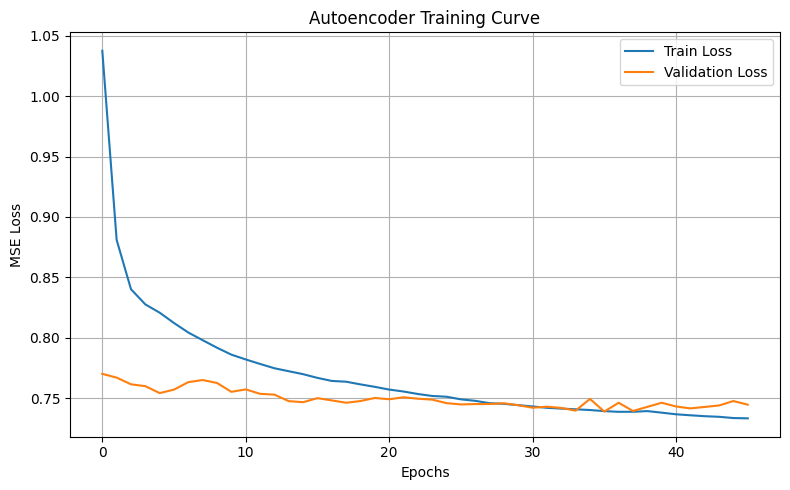

In [38]:
# 9. 학습곡선 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
print("Min:", esv_scaled.min(), "Max:", esv_scaled.max())
print("Mean:", esv_scaled.mean(), "Std:", esv_scaled.std())
print("Zeros:", np.sum(esv_scaled == 0))


Min: 0.0 Max: 1.0
Mean: 0.029285185709004968 Std: 0.10400539123142388
Zeros: 3306292
